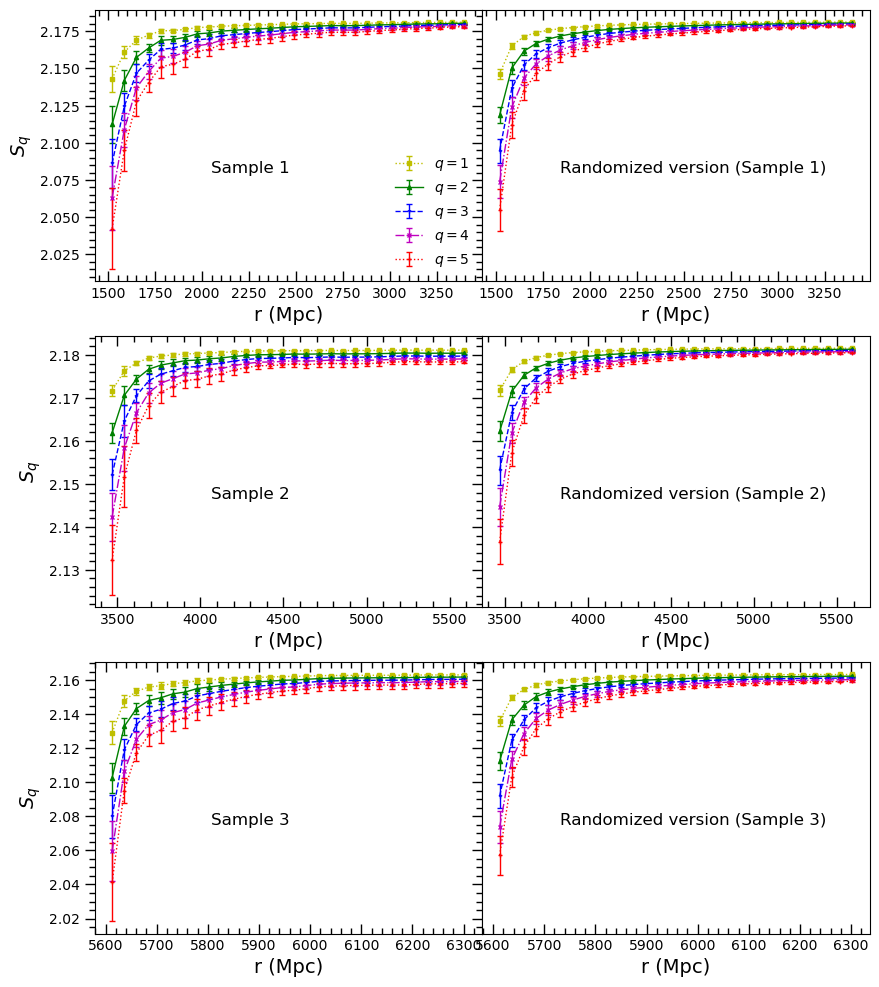

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Create a 3x2 grid with shared y-axis and no spacing between columns
fig, axes = plt.subplots(3, 2, figsize=(10, 12), gridspec_kw={'wspace': 0, 'hspace': 0.2}, sharey='row')

for n in range(3):
    # Load actual data
    f_name1 = f'sample{n+1}_entr_err.csv'
    df = pd.read_csv(f_name1)
    r_data = df['r'].to_numpy()
    s = [df[f'a{i}'].to_numpy() for i in range(1, 6)]
    ds = [df[f'std_a{i}'].to_numpy() for i in range(1, 6)]

    # Load randomized data
    f_rand = f'sample_rand_{n+1}_entropy.csv'
    df_rand = pd.read_csv(f_rand)
    r_rand = df_rand['r'].to_numpy()
    mean_rand = [df_rand[f'mean_a{i}'].to_numpy() for i in range(1, 6)]
    std_rand = [df_rand[f'std_a{i}'].to_numpy() for i in range(1, 6)]

    # Define styles and labels
    labels = [r'$q = 1$', r'$q = 2$', r'$q = 3$', r'$q = 4$', r'$q = 5$']
    styles = [(':', 's', 'y'), ('-', '^', 'g'), ('--', '1', 'b'), ('-.', 'x', 'm'), (':', '+', 'r')]

    # Left panel: actual data
    ax_left = axes[n, 0]
    ax_left.set_xlabel("r (Mpc)", fontsize=14)
    # if n == 1:
    ax_left.set_ylabel(r"$S_q$", fontsize=14)
    for i in range(5):
        ls, marker, color = styles[i]
        ax_left.errorbar(r_data, s[i], yerr=ds[i], ls=ls, lw=1, marker=marker, markersize=3,
                         c=color, ecolor=color, elinewidth=1, capsize=2, label=labels[i])
    if n == 0:
        ax_left.legend(fontsize=10, frameon=False)
    ax_left.xaxis.set_minor_locator(AutoMinorLocator())
    ax_left.yaxis.set_minor_locator(AutoMinorLocator())
    ax_left.tick_params(which='both', width=1, labelsize=10)
    ax_left.tick_params(which='major', length=7)
    ax_left.tick_params(which='minor', length=4, color='k')

    ax_left.text(0.3, 0.4, f"Sample {n+1}", transform=ax_left.transAxes, fontsize=12)

    # Right panel: randomized data
    ax_right = axes[n, 1]
    ax_right.set_xlabel("r (Mpc)", fontsize=14)
    for i in range(5):
        ls, marker, color = styles[i]
        ax_right.errorbar(r_rand, mean_rand[i], yerr=std_rand[i], ls=ls, lw=1, marker=marker,
                          markersize=3, c=color, ecolor=color, elinewidth=1, capsize=2, label=labels[i])
    ax_right.xaxis.set_minor_locator(AutoMinorLocator())
    ax_right.yaxis.set_minor_locator(AutoMinorLocator())
    ax_right.tick_params(axis='x', which='both', width=1, labelsize=10)
    ax_right.tick_params(axis='y', which='both', width=1, labelsize=10)
    ax_right.tick_params(axis='x', which='major', length=7)
    ax_right.tick_params(axis='x', which='minor', length=4, color='k')
    ax_right.tick_params(axis='y', which='major', length=7)
    ax_right.tick_params(axis='y', which='minor', length=4)

    
    # ax_right.tick_params(axis='y', left=False, labelleft=False)  # Hide right y-axis
    ax_right.text(0.2, 0.4, f"Randomized version (Sample {n+1})", transform=ax_right.transAxes, fontsize=12)
    for ax in [ax_left, ax_right]:
        ax.tick_params(axis='x', which='both', top=True, labeltop=False, direction='in', width=1, length=7)
        # ax.tick_params(axis='y', which='both', direction='in', width=1, length=7)
        ax.tick_params(which='minor', length=4, color='k')  
# Save and display
plt.savefig("combine_entropy.pdf", bbox_inches='tight')
plt.show()


In [2]:
# import numpy as np
# import pandas as pd
# import healpy as hp
# from statistics import stdev, mean
# import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator, AutoMinorLocator
# from matplotlib.ticker import ScalarFormatter
# from matplotlib.transforms import ScaledTranslation

# for n in range(3):
    
#     f_name1 = 'sample' + str(n + 1) + '_entr_err.csv'
#     df = pd.read_csv(f_name1)

#     r_data  = df['r'].to_numpy()
#     s1   = df['a1'].to_numpy()
#     s2   = df['a2'].to_numpy()
#     s3   = df['a3'].to_numpy()
#     s4   = df['a4'].to_numpy()
#     s5   = df['a5'].to_numpy()
#     d_a1 = df['std_a1'].to_numpy()
#     d_a2 = df['std_a2'].to_numpy()
#     d_a3 = df['std_a3'].to_numpy()
#     d_a4 = df['std_a4'].to_numpy()
#     d_a5 = df['std_a5'].to_numpy()




    
#     f_rand_entropy = 'sample_rand_'+str(n+1)+'_entropy.csv' 
#     df = pd.read_csv(f_rand_entropy)
#     r_rand = df['r'].to_numpy()
#     mean_a1_rand = df['mean_a1'].to_numpy()
#     mean_a2_rand = df['mean_a2'].to_numpy()
#     mean_a3_rand = df['mean_a3'].to_numpy()
#     mean_a4_rand = df['mean_a4'].to_numpy()
#     mean_a5_rand = df['mean_a5'].to_numpy()
#     d_a1_rand = df['std_a1'].to_numpy()
#     d_a2_rand = df['std_a2'].to_numpy()
#     d_a3_rand = df['std_a3'].to_numpy()
#     d_a4_rand = df['std_a4'].to_numpy()
#     d_a5_rand = df['std_a5'].to_numpy()


# ##############################################################################################    
#     fig, axes = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True,sharey=True)
#     # Panel 1: D vs r
#     ax = axes[0]
#     ax.set_xlabel("r (Mpc)", fontsize = 15)
#     ax.set_ylabel(r" S$_{q}$", fontsize = 15)
#     ax.errorbar(r_data,s1,yerr=d_a1,ls=':',lw=1, marker = 's',markersize=3, c = 'y',ecolor='y',elinewidth=1,capsize=2, label='$ q = 1 $')
#     ax.errorbar(r_data,s2,yerr=d_a2,ls='-',lw=1, marker = '^',markersize=3, c = 'g',ecolor='g',elinewidth=1,capsize=2, label='$ q = 2 $')
#     ax.errorbar(r_data,s3,yerr=d_a3,ls='--',lw=1, marker = '1',markersize=3, c = 'b',ecolor='b',elinewidth=1,capsize=2, label='$ q = 3 $')
#     ax.errorbar(r_data,s4,yerr=d_a4,ls='-.',lw=1, marker = 'x',markersize=3, c = 'm',ecolor='m',elinewidth=1,capsize=2, label='$ q = 4 $')
#     ax.errorbar(r_data,s5,yerr=d_a5,ls=':', lw=1,marker = '+',markersize=3, c = 'r',ecolor='r',elinewidth=1,capsize=2, label='$ q = 5 $')
#     if(n==0):
#         ax.legend(fontsize=10, frameon=False)

#     ax.xaxis.set_minor_locator(AutoMinorLocator())
#     ax.yaxis.set_minor_locator(AutoMinorLocator())

#     ax.tick_params(which='both', width=1)
#     ax.tick_params(which='major', length=7)
#     ax.tick_params(which='minor', length=4, color='k')
    
#     if n == 0:
#         ax.text(0.7, 0.8, "Sample 1", transform=ax.transAxes, fontsize=12)

#     if n == 1:
#         ax.text(0.7, 0.8, "Sample 2", transform=ax.transAxes, fontsize=12)
        
#     if n == 2:
#         ax.text(0.7, 0.8, "Sample 3", transform=ax.transAxes, fontsize=12)

# ############################################################################

#     ax = axes[1]
#     ax.set_xlabel("r (Mpc)", fontsize = 15)
#     #ax.set_ylabel(r" S$_{q}$", fontsize = 15)

#     ax.errorbar(r_rand, mean_a1_rand, yerr=d_a1_rand, ls=':', lw=1, marker='s', markersize=3, 
#             c='y', ecolor='y', elinewidth=1, capsize=2, label='$q = 1$ ')

#     ax.errorbar(r_rand, mean_a2_rand, yerr=d_a2_rand, ls='-', lw=1, marker='^', markersize=3, 
#             c='g', ecolor='g', elinewidth=1, capsize=2, label='$q = 2$')

#     ax.errorbar(r_rand, mean_a3_rand, yerr=d_a3_rand, ls='--', lw=1, marker='1', markersize=3, 
#             c='b', ecolor='b', elinewidth=1, capsize=2, label='$q = 3$')

#     ax.errorbar(r_rand, mean_a4_rand, yerr=d_a4_rand, ls='-.', lw=1, marker='x', markersize=3, 
#             c='m', ecolor='m', elinewidth=1, capsize=2, label='$q = 4$')

#     ax.errorbar(r_rand, mean_a5_rand, yerr=d_a5_rand, ls=':', lw=1, marker='+', markersize=3, 
#             c='r', ecolor='r', elinewidth=1, capsize=2, label='$q = 5$')
#     #ax.legend(fontsize=10, frameon=False)

#     # Enable scientific notation on the y-axis
#     # formatter = ScalarFormatter(useMathText=True)
#     # formatter.set_powerlimits((-1, 1))  # Always show scientific notation
#     # ax.yaxis.set_major_formatter(formatter)

#     ax.xaxis.set_minor_locator(AutoMinorLocator())
#    # ax.yaxis.set_minor_locator(AutoMinorLocator())

#     ax.tick_params(axis='x',which='both', width=1)
#     ax.tick_params(axis='x',which='major', length=7)
#     ax.tick_params(axis='x',which='minor', length=4, color='k')
#     #ax.set_ybound(0.5*10**(-4),0.0)
#     #ax.axhline(y=0, color='k', linestyle='--', linewidth=1)

#     if n == 0:
#         ax.text(0.3, 0.4, "Rndomized version (Sample 1)", transform=ax.transAxes, fontsize=10)

#     if n == 1:
#         ax.text(0.3, 0.4, "Randomized version (Sample 2)", transform=ax.transAxes, fontsize=10)
        
#     if n == 2:
#         ax.text(0.3, 0.4, "Randomized version (Sample 3)", transform=ax.transAxes, fontsize=10)
    
#     out_plot = 'sample'+str(n+1)+'_combine.pdf'
#     plt.savefig(out_plot, bbox_inches='tight')
#     plt.show()
